### Import Libraries

In [16]:
import numpy as np 
import pandas as pd
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.signal import find_peaks
from statsmodels.nonparametric.smoothers_lowess import lowess
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Sample Data Generation

In [5]:
# Reproducibility Id
np.random.seed(10)

no_of_records = 60

date_value = np.array("2022-01-01", dtype=np.datetime64)
# Creating 60 Dates, Starting From 2022-01-01
date_values = date_value + np.arange(no_of_records)
date_values = date_values.astype('str')
print("--"*10)
print("Dates")
print("--"*10)
display(date_values)

# np.random.randint(low=1, high=100, size=(2, 2))
values = np.random.randint(low=10, high=90, size=(no_of_records))
values = values.astype('int')
print("--"*10)
print("Values")
print("--"*10)
display(values)

--------------------
Dates
--------------------


array(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
       '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
       '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
       '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
       '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
       '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
       '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
       '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01'],
      dtype='<U28')

--------------------
Values
--------------------


array([19, 25, 74, 38, 39, 18, 83, 10, 50, 46, 26, 21, 64, 72, 43, 82, 88,
       59, 61, 64, 87, 79, 23, 35, 23, 40, 40, 22, 75, 41, 67, 46, 37, 28,
       87, 32, 33, 21, 38, 84, 19, 25, 28, 81, 21, 27, 56, 17, 85, 38, 43,
       54, 15, 14, 81, 60, 64, 44, 25, 87])

- Convert 2 Arrays --> 2d Array

In [6]:
data_array = np.vstack((date_values, values)).T
print("--"*15)
print("Head : 5 Records")
print("--"*15)
display(data_array[:5])

print("--"*15)
print("Tail : 5 Records")
print("--"*15)
display(data_array[55:60])

------------------------------
Head : 5 Records
------------------------------


array([['2022-01-01', '19'],
       ['2022-01-02', '25'],
       ['2022-01-03', '74'],
       ['2022-01-04', '38'],
       ['2022-01-05', '39']], dtype='<U28')

------------------------------
Tail : 5 Records
------------------------------


array([['2022-02-25', '60'],
       ['2022-02-26', '64'],
       ['2022-02-27', '44'],
       ['2022-02-28', '25'],
       ['2022-03-01', '87']], dtype='<U28')

- Data Frame Creation

In [7]:
# # DataFrame Creation Using 2d Array
# df = pd.DataFrame(data=data_array, columns=["Date", "Values"])

# DataFrame Creation Using Individual Array
df = pd.DataFrame({'Date':pd.Series(date_values.tolist(), dtype='str'),
                    'Value':pd.Series(values.tolist(), dtype='int')
                    })

df["Date"] = df["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

print("--"*15)
print("Head : 5 Records")
print("--"*15)
display(df.head(5))

print("--"*15)
print("Tail : 5 Records")
print("--"*15)
display(df.tail(5))

------------------------------
Head : 5 Records
------------------------------


,Date,Value
0,2022-01-01,19
1,2022-01-02,25
2,2022-01-03,74
3,2022-01-04,38
4,2022-01-05,39


------------------------------
Tail : 5 Records
------------------------------


,Date,Value
55,2022-02-25,60
56,2022-02-26,64
57,2022-02-27,44
58,2022-02-28,25
59,2022-03-01,87


In [9]:
# Data Frame Stats
display(df.describe())

# Data Frame Info
display(df.info())

,Date,Value
count,60,60.000000
mean,2022-01-30 12:00:00,46.733333
min,2022-01-01 00:00:00,10.000000
25%,2022-01-15 18:00:00,25.000000
50%,2022-01-30 12:00:00,40.500000
75%,2022-02-14 06:00:00,64.750000
max,2022-03-01 00:00:00,88.000000
std,NaN,23.991430


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Value   60 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 852.0 bytes


None

### Lag's Creation

In [174]:
df["Lag_1"] = df.Value.shift(1)
df["Lag_2"] = df.Value.shift(2)
df["Lag_3"] = df.Value.shift(3)

print("--"*15)
print("Head : 5 Records")
print("--"*15)
display(df.head(5))

print("--"*15)
print("Tail : 5 Records")
print("--"*15)
display(df.tail(5))

------------------------------
Head : 5 Records
------------------------------


,Date,Value,Lag_1,Lag_2,Lag_3
0,2022-01-01,19,NaN,NaN,NaN
1,2022-01-02,25,19.0,NaN,NaN
2,2022-01-03,74,25.0,19.0,NaN
3,2022-01-04,38,74.0,25.0,19.0
4,2022-01-05,39,38.0,74.0,25.0


------------------------------
Tail : 5 Records
------------------------------


,Date,Value,Lag_1,Lag_2,Lag_3
55,2022-02-25,60,81.0,14.0,15.0
56,2022-02-26,64,60.0,81.0,14.0
57,2022-02-27,44,64.0,60.0,81.0
58,2022-02-28,25,44.0,64.0,60.0
59,2022-03-01,87,25.0,44.0,64.0


### Moving Average Smoothing

In [11]:
df_1 = df.copy(deep=True)
df_1.index = df_1.Date

print("--"*15)
print("Head : 5 Records")
print("--"*15)
display(df_1.head(5))

print("--"*15)
print("Tail : 5 Records")
print("--"*15)
display(df_1.tail(5))

------------------------------
Head : 5 Records
------------------------------


,Date,Value
Date,,
2022-01-01,2022-01-01,19
2022-01-02,2022-01-02,25
2022-01-03,2022-01-03,74
2022-01-04,2022-01-04,38
2022-01-05,2022-01-05,39


------------------------------
Tail : 5 Records
------------------------------


,Date,Value
Date,,
2022-02-25,2022-02-25,60
2022-02-26,2022-02-26,64
2022-02-27,2022-02-27,44
2022-02-28,2022-02-28,25
2022-03-01,2022-03-01,87


In [12]:
# Moving Average - Rolling Window(2)
df_ma_2 = df_1.Value.rolling(2, center=True, closed="both").mean()
# Moving Average - Rolling Window(3)
df_ma_3 = df_1.Value.rolling(3, center=True, closed="both").mean()

print("--"*10)
print("Original")
print("--"*10)
display(df_1.Value[:5])
print("--"*10)
print("Moving Average - Rolling Window(2)")
print("--"*10)
display(df_ma_2[:5])
print("--"*10)
print("Moving Average - Rolling Window(3)")
print("--"*10)
display(df_ma_3[:5])

--------------------
Original
--------------------


Date
2022-01-01    19
2022-01-02    25
2022-01-03    74
2022-01-04    38
2022-01-05    39
Name: Value, dtype: int32

--------------------
Moving Average - Rolling Window(2)
--------------------


Date
2022-01-01          NaN
2022-01-02    22.000000
2022-01-03    39.333333
2022-01-04    45.666667
2022-01-05    50.333333
Name: Value, dtype: float64

--------------------
Moving Average - Rolling Window(3)
--------------------


Date
2022-01-01          NaN
2022-01-02    39.333333
2022-01-03    39.000000
2022-01-04    44.000000
2022-01-05    42.250000
Name: Value, dtype: float64

- **Find Positive Peaks(> Peak Threshold)**

In [14]:
peak_threshold = 20
# Find Peaks i.e., > 20 (In MA - [Rolling Window - 2] data)
peaks = find_peaks(df_ma_2, prominence=1)# With Hyperparameter finds best reasonable peaks in data
df_ma_2_temp = df_ma_2.copy(deep=True).reset_index()
df_ma_2_peaks = df_ma_2_temp.iloc[peaks[0], :].loc[df_ma_2_temp.Value > peak_threshold,:]
df_ma_2_peaks.index = df_ma_2_peaks.Date
display(df_ma_2_peaks[:5])

# Find Peaks i.e., > 20 (In MA - [Rolling Window - 3] data)
peaks = find_peaks(df_ma_3, prominence=1)# With Hyperparameter finds best reasonable peaks in data
df_ma_3_temp = df_ma_3.copy(deep=True).reset_index()
df_ma_3_peaks = df_ma_3_temp.iloc[peaks[0], :].loc[df_ma_3_temp.Value > peak_threshold,:]
df_ma_3_peaks.index = df_ma_3_peaks.Date
display(df_ma_3_peaks[:5])

,Date,Value
Date,,
2022-01-05,2022-01-05,50.333333
2022-01-07,2022-01-07,46.666667
2022-01-09,2022-01-09,47.666667
2022-01-11,2022-01-11,40.666667
2022-01-18,2022-01-18,76.333333


,Date,Value
Date,,
2022-01-04,2022-01-04,44.00
2022-01-06,2022-01-06,44.50
2022-01-09,2022-01-09,47.25
2022-01-16,2022-01-16,71.25
2022-01-18,2022-01-18,72.50


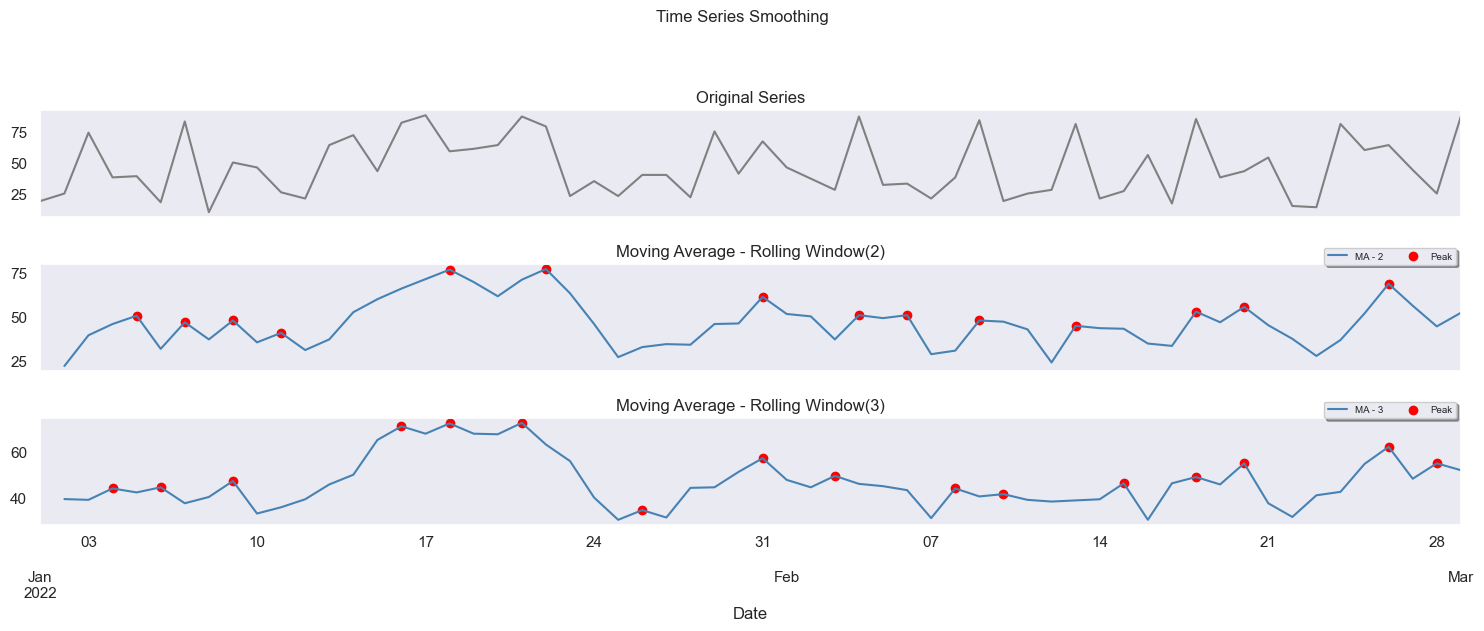

In [20]:
# Plotting
sns.set_theme("notebook", style="dark")

fig, axes = plt.subplots(3, 1, figsize=(15, 6), sharex=True, dpi=100)

df_1.Value.plot(ax=axes[0], color="gray", title="Original Series")
df_ma_2.plot(ax=axes[1], color="steelblue", title="Moving Average - Rolling Window(2)", label="MA - 2")
axes[1].scatter(df_ma_2_peaks.index, df_ma_2_peaks["Value"], marker="o", color="red", label="Peak")
axes[1].legend(bbox_to_anchor=(1, 1.2), fancybox=True, shadow=True, ncol=5, loc="upper right", prop={"size":7})

df_ma_3.plot(ax=axes[2], color="steelblue", title="Moving Average - Rolling Window(3)", label="MA - 3")
axes[2].scatter(df_ma_3_peaks.index, df_ma_3_peaks["Value"], marker="o", color="red", label="Peak")
axes[2].legend(bbox_to_anchor=(1, 1.2), fancybox=True, shadow=True, ncol=5, loc="upper right", prop={"size":7})

fig.suptitle("Time Series Smoothing", y=1.05, fontsize=12)


plt.tight_layout()
plt.show()

### Loess Smoothing

In [21]:
# Loess - 6% percentage
df_loess_6 = pd.DataFrame(lowess(df_1.Value, np.arange(len(df_1.Value)), frac=0.06)[:, 1], index=df_1.index, columns=["Value"])
# Loess - 10% percentage
df_loess_10 = pd.DataFrame(lowess(df_1.Value, np.arange(len(df_1.Value)), frac=0.1)[:, 1], index=df_1.index, columns=["Value"])

print("--"*10)
print("Original")
print("--"*10)
display(df_1.Value[:5])
print("--"*10)
print("Loess Smoothed 6%")
print("--"*10)
display(df_loess_6[:5])
print("--"*10)
print("Loess Smoothed 10%")
print("--"*10)
display(df_loess_10[:5])

--------------------
Original
--------------------


Date
2022-01-01    19
2022-01-02    25
2022-01-03    74
2022-01-04    38
2022-01-05    39
Name: Value, dtype: int32

--------------------
Loess Smoothed 6%
--------------------


,Value
Date,
2022-01-01,19.0
2022-01-02,25.0
2022-01-03,74.0
2022-01-04,38.0
2022-01-05,39.0


--------------------
Loess Smoothed 10%
--------------------


,Value
Date,
2022-01-01,21.620436
2022-01-02,31.695587
2022-01-03,39.959632
2022-01-04,42.131760
2022-01-05,37.116036


- **Find Positive Peaks(> Peak Threshold)**

In [23]:
peak_threshold = 20
# Find Peaks i.e., > 20 (In Loess smoothed 6% data)
df_loess_6_temp = df_loess_6.copy(deep=True).reset_index()
peaks = find_peaks(df_loess_6_temp.Value, prominence=1)# With Hyperparameter finds best reasonable peaks in data
df_loess_6_peaks = df_loess_6_temp.iloc[peaks[0], :].loc[df_loess_6_temp.Value > peak_threshold,:]
df_loess_6_peaks.index = df_loess_6_peaks.Date
display(df_loess_6_peaks[:5])

# Find Peaks i.e., > 20 (In Loess smoothed 10% data)
df_loess_10_temp = df_loess_10.copy(deep=True).reset_index()
peaks = find_peaks(df_loess_10_temp.Value, prominence=1)# With Hyperparameter finds best reasonable peaks in data
df_loess_10_peaks = df_loess_10_temp.iloc[peaks[0], :].loc[df_loess_10_temp.Value > peak_threshold,:]
df_loess_10_peaks.index = df_loess_10_peaks.Date
display(df_loess_10_peaks[:5])

,Date,Value
Date,,
2022-01-03,2022-01-03,74.0
2022-01-05,2022-01-05,39.0
2022-01-07,2022-01-07,83.0
2022-01-09,2022-01-09,50.0
2022-01-14,2022-01-14,72.0


,Date,Value
Date,,
2022-01-04,2022-01-04,42.131760
2022-01-09,2022-01-09,38.304722
2022-01-17,2022-01-17,72.154675
2022-01-21,2022-01-21,70.192801
2022-01-30,2022-01-30,54.000980


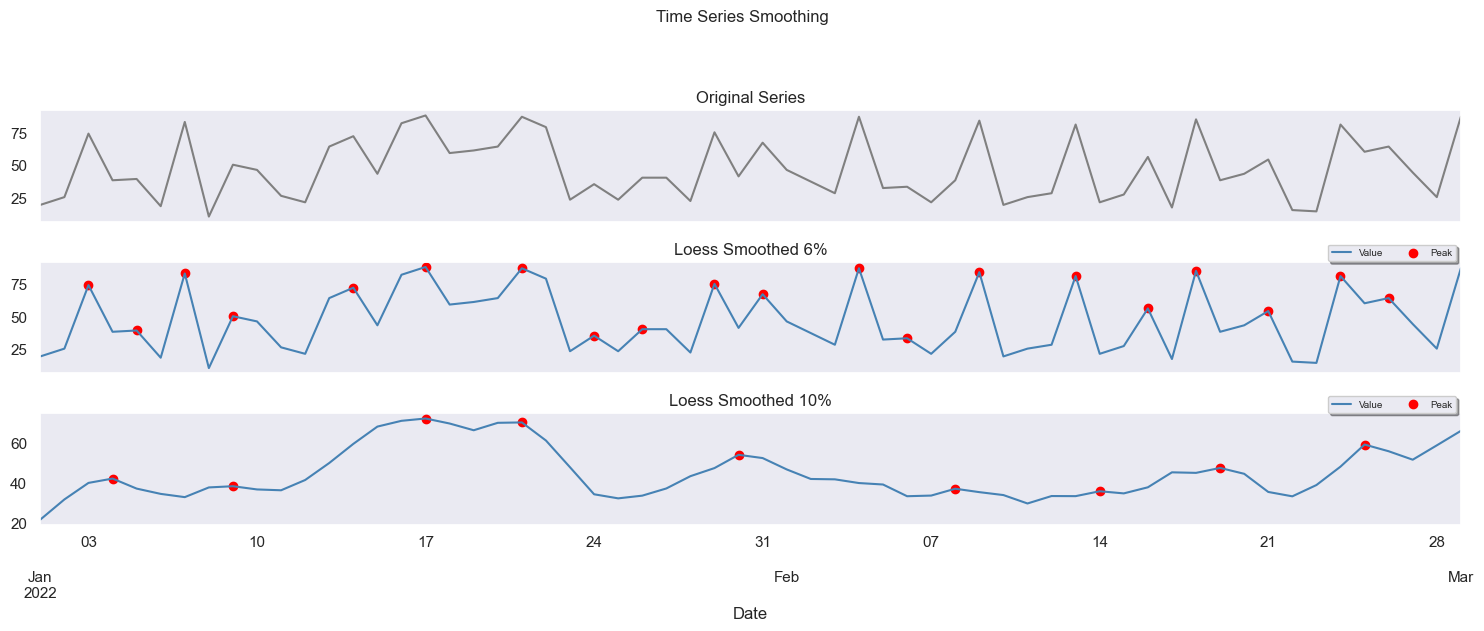

In [25]:
# Plotting
sns.set_theme("notebook", style="dark")

fig, axes = plt.subplots(3, 1, figsize=(15, 6), sharex=True, dpi=100)

df_1.Value.plot(ax=axes[0], color="gray", title="Original Series")
df_loess_6.plot(ax=axes[1], color="steelblue", title="Loess Smoothed 6%", label="Loess Smoothed 6%")
axes[1].scatter(df_loess_6_peaks.index, df_loess_6_peaks["Value"], marker="o", color="red", label="Peak")
axes[1].legend(bbox_to_anchor=(1, 1.2), fancybox=True, shadow=True, ncol=5, loc="upper right", prop={"size":7})

df_loess_10.plot(ax=axes[2], color="steelblue", title="Loess Smoothed 10%", label="Loess Smoothed 10%")
axes[2].scatter(df_loess_10_peaks.index, df_loess_10_peaks["Value"], marker="o", color="red", label="Peak")
axes[2].legend(bbox_to_anchor=(1, 1.2), fancybox=True, shadow=True, ncol=5, loc="upper right", prop={"size":7})

fig.suptitle("Time Series Smoothing", y=1.05, fontsize=12)

plt.tight_layout()
plt.show()


`Observation`

- Loess Smoothing works and prepare data smoothing only, if we give correct data percentage parameter value for smoothing calculation. 
- But in Moving Average smoothing, we can see time series smoothing happens for every rolling window we select.